# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Регрессия и классификация. <font color="blue"><i>Легкая часть</i></font>


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 6 баллов
* Задача 3 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 2 балла
* Задача 5 &mdash; 5 баллов
* Задача 6 &mdash; 5 баллов
* Задача 7 &mdash; 3 балла

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*. Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">ноутбук</a> с лекции про закон больших чисел. За использование циклов оценка может быть существенно снижена.

**a).** Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$
Обратите внимание, что нужно взять теоретические математическое ожидание и дисперсию, а не вычислять их по выборке.

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import pandas as pd

n = 300
cnt = 500

In [2]:
samples = sps.expon.rvs(size=(cnt, n))

cum_sum = samples.cumsum(axis=1)


EX = (np.arange(n) + 1) * sps.expon.mean()
DX = (np.arange(n) + 1) * sps.expon.var()

Z = (cum_sum - EX)/(DX **(1/2))

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

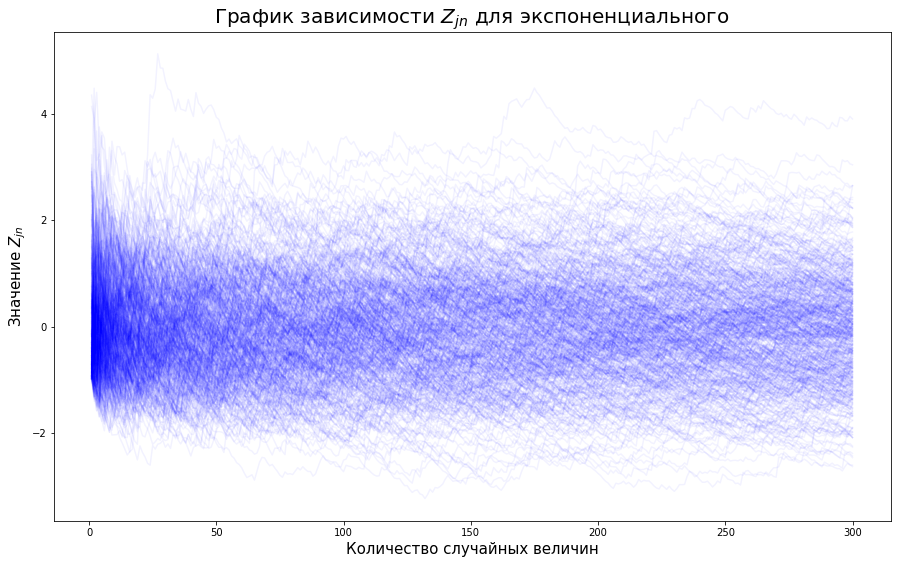

In [3]:
plt.figure(figsize=(15, 9))
for i in range(cnt):
    plt.plot(np.arange(n) + 1, Z[i], color='blue', alpha=0.05)
plt.xlabel('Количество случайных величин', fontsize=15)
plt.ylabel('Значение $Z_{jn}$', fontsize=15)
plt.title('График зависимости $Z_{jn}$ для экспоненциального', fontsize=20)
plt.show()

Значения сходятся к нулю.

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду.

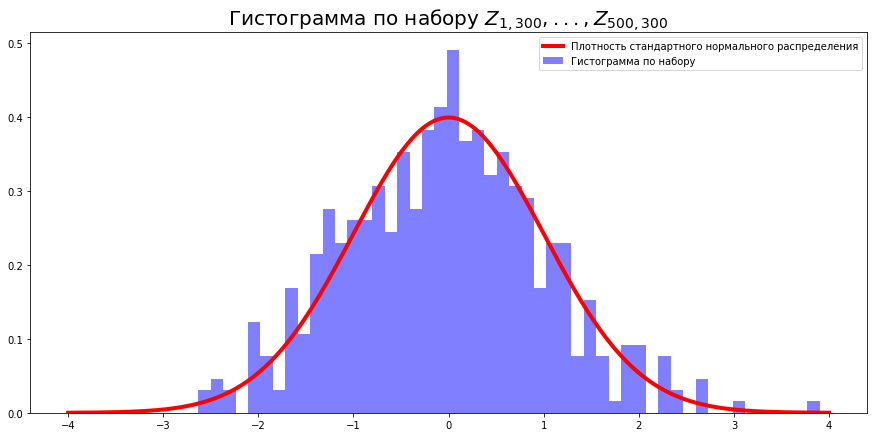

In [4]:
plt.figure(figsize=(15, 7))

grid = np.linspace(-4, 4, 500)

plt.hist(
    Z[:, n - 1],
    bins=50,
    alpha=0.5,
    density=True,
    color='blue',
)

plt.plot(
    grid,
    sps.norm(0, 1).pdf(grid),
    color='red',
    linewidth=4,
    label='Плотность случайной величины'
)


plt.title('Гистограмма по набору $Z_{1,300}, ..., Z_{500,300}$', fontsize=20)
plt.legend(('Плотность стандартного нормального распределения', 'Гистограмма по набору'))
plt.show()

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

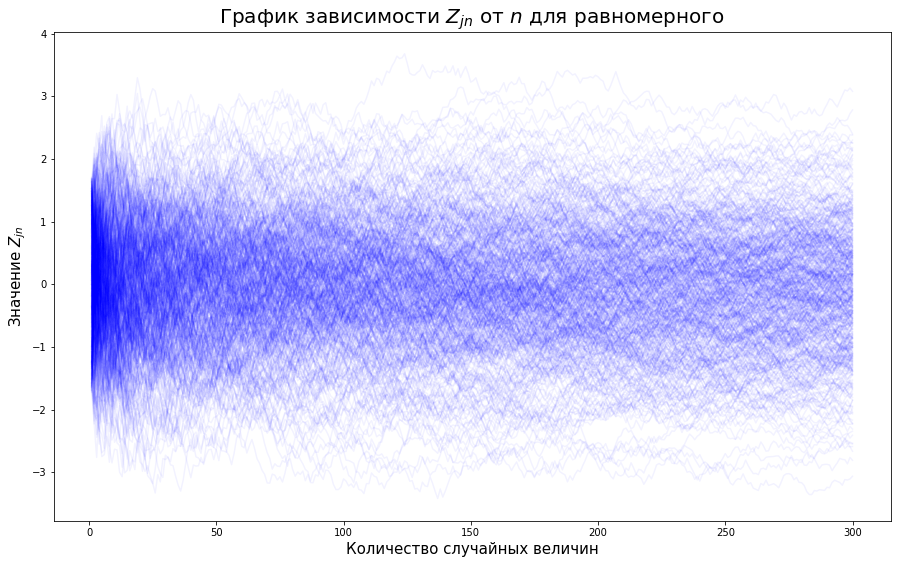

In [5]:
samples_u = sps.uniform(0, 1).rvs(size=(cnt, n))

cum_sum_u = samples_u.cumsum(axis=1)

EX = (np.arange(n) + 1) * sps.uniform(0, 1).mean()
DX = (np.arange(n) + 1) * sps.uniform(0, 1).var()

Z_u = (cum_sum_u - EX)/(DX **(1/2))

plt.figure(figsize=(15, 9))
for i in range(cnt):
    plt.plot(np.arange(n) + 1, Z_u[i], color='blue', alpha=0.05)
plt.xlabel('Количество случайных величин', fontsize=15)
plt.ylabel('Значение $Z_{jn}$', fontsize=15)
plt.title('График зависимости $Z_{jn}$ от $n$ для равномерного', fontsize=20)
plt.show()

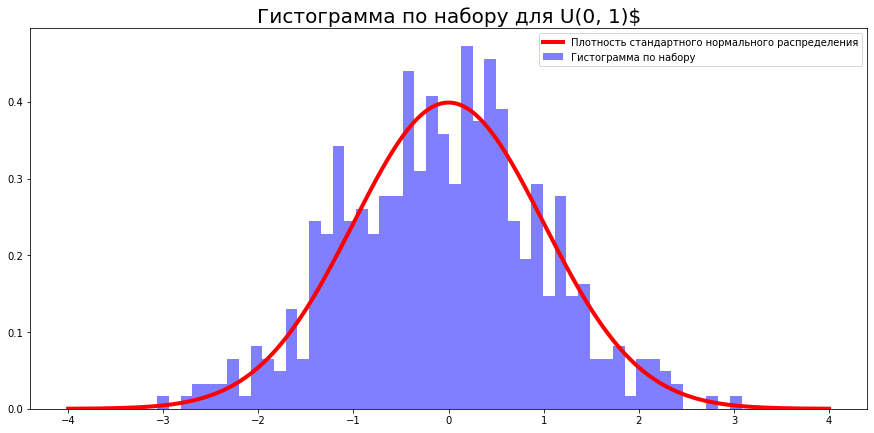

In [6]:
plt.figure(figsize=(15, 7))

grid = np.linspace(-4, 4, 500)


plt.hist(
    Z_u[:, n - 1],
    bins=50,
    alpha=0.5,
    density=True,
    color='blue',
)

plt.plot(
    grid,
    sps.norm(0, 1).pdf(grid),
    color='red',
    linewidth=4,
    label='Плотность случайной величины'
)

plt.title('Гистограмма по набору для U(0, 1)$', fontsize=20)
plt.legend(('Плотность стандартного нормального распределения', 'Гистограмма по набору'))
plt.show()

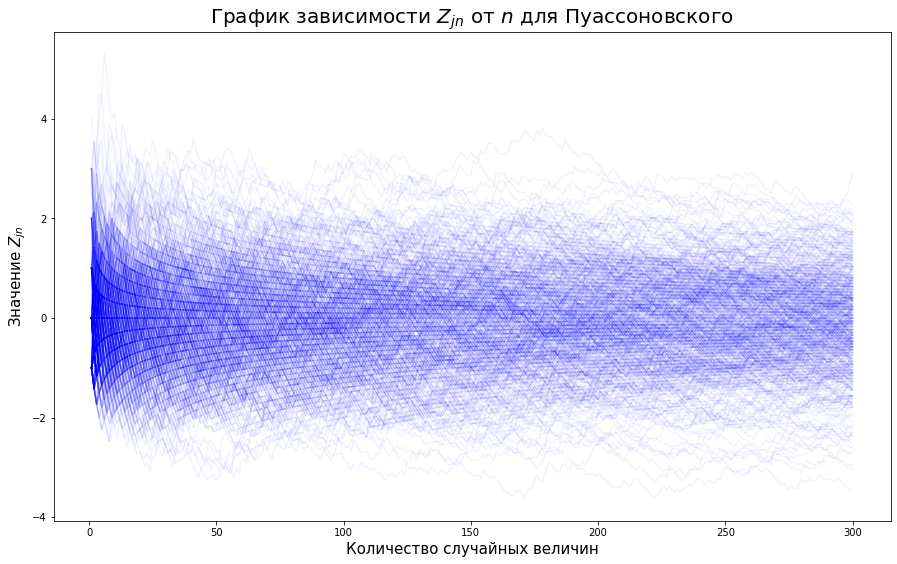

In [7]:
samples_p = sps.poisson(1).rvs(size=(cnt, n))

cum_sum_p = samples_p.cumsum(axis=1)

EX = (np.arange(n) + 1) * sps.poisson(1).mean()
DX = (np.arange(n) + 1) * sps.poisson(1).var()

Z_p = (cum_sum_p - EX) / (DX **(1/2))

plt.figure(figsize=(15, 9))
for i in range(cnt):
    plt.plot(np.arange(n) + 1, Z_p[i], color='blue', alpha=0.05)
plt.xlabel('Количество случайных величин', fontsize=15)
plt.ylabel('Значение $Z_{jn}$', fontsize=15)
plt.title('График зависимости $Z_{jn}$ от $n$ для Пуассоновского', fontsize=20)
plt.show()

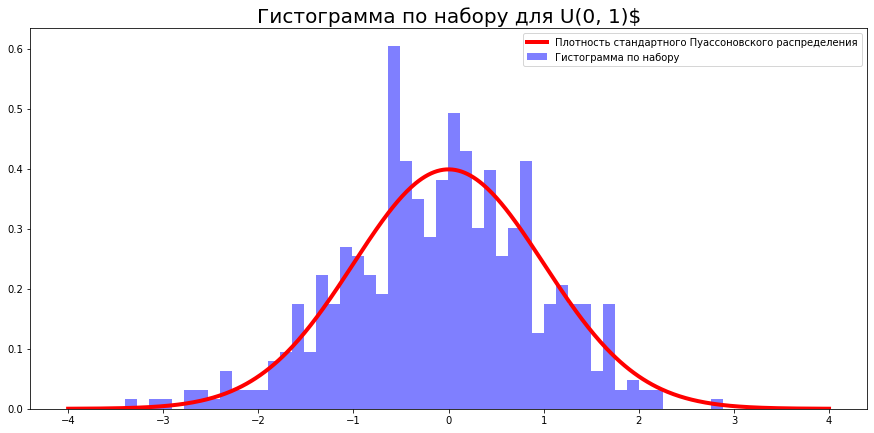

In [8]:
plt.figure(figsize=(15, 7))

grid = np.linspace(-4, 4, 500)


plt.hist(
    Z_p[:, n - 1],
    bins=50,
    alpha=0.5,
    density=True,
    color='blue',
)

plt.plot(
    grid,
    sps.norm(0, 1).pdf(grid),
    color='red',
    linewidth=4,
    label='Плотность случайной величины'
)


plt.title('Гистограмма по набору для U(0, 1)$', fontsize=20)
plt.legend(('Плотность стандартного Пуассоновского распределения', 'Гистограмма по набору'))
plt.show()

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Рекомендуем также посмотреть <a target="_blank" href="https://www.zoology.ubc.ca/~whitlock/Kingfisher/CLT.htm">интерактивную визуализацию</a>.

**Вывод**: 
Мы показали, что центральная предельная теорема работает, 
    то есть при больших $n$ распределение нашего $Z_{jn}$, действительно, стремится к стандартному нормальному распределению.

### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок по городу на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов в ряде городов США. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

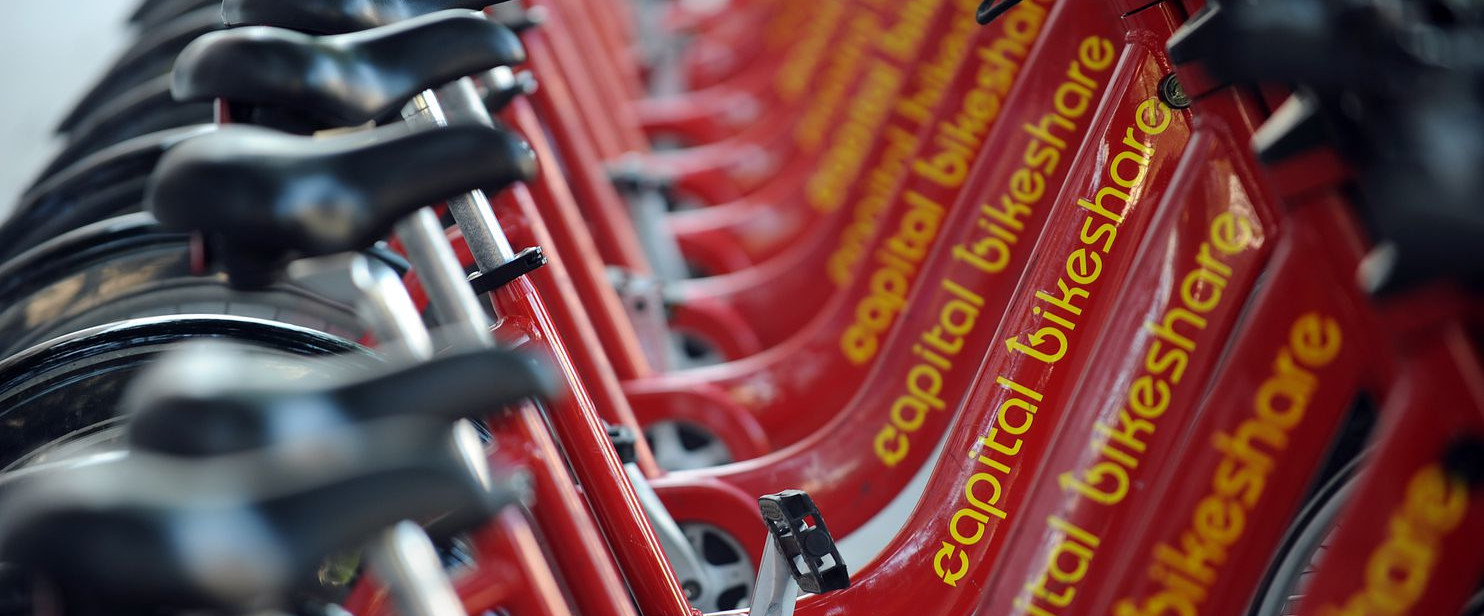

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [111]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [112]:
train, test = train_test_split(data, test_size=0.2)

In [113]:
train.shape, test.shape

((584, 16), (147, 16))

In [114]:
train.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
331,332,2011-11-28,4,0,11,0,1,1,1,0.503478,0.490122,0.743043,0.142122,253,3614,3867
164,165,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891
200,201,2011-07-20,3,0,7,0,3,1,1,0.768333,0.746850,0.707083,0.113817,644,3688,4332
425,426,2012-03-01,1,1,3,0,4,1,1,0.485833,0.475371,0.615417,0.226987,325,4665,4990
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [115]:
train_x = train[['temp', 'atemp',
               'hum', 'windspeed', 'season','mnth', 'holiday', 'weekday', 
               'workingday', 'weathersit']]
train_y = train[['cnt']]
train_y = train_y.to_numpy()
train_x.head()

,temp,atemp,hum,windspeed,season,mnth,holiday,weekday,workingday,weathersit
331,0.503478,0.490122,0.743043,0.142122,4,11,0,1,1,1
164,0.604167,0.591546,0.507083,0.269283,2,6,0,2,1,1
200,0.768333,0.746850,0.707083,0.113817,3,7,0,3,1,1
425,0.485833,0.475371,0.615417,0.226987,1,3,0,4,1,1
369,0.265833,0.278412,0.524167,0.129987,1,1,0,4,1,1


Посмотрите по графикам, как целевой признак зависит от остальных и поймите характер зависимости целевого признака от остальных. 

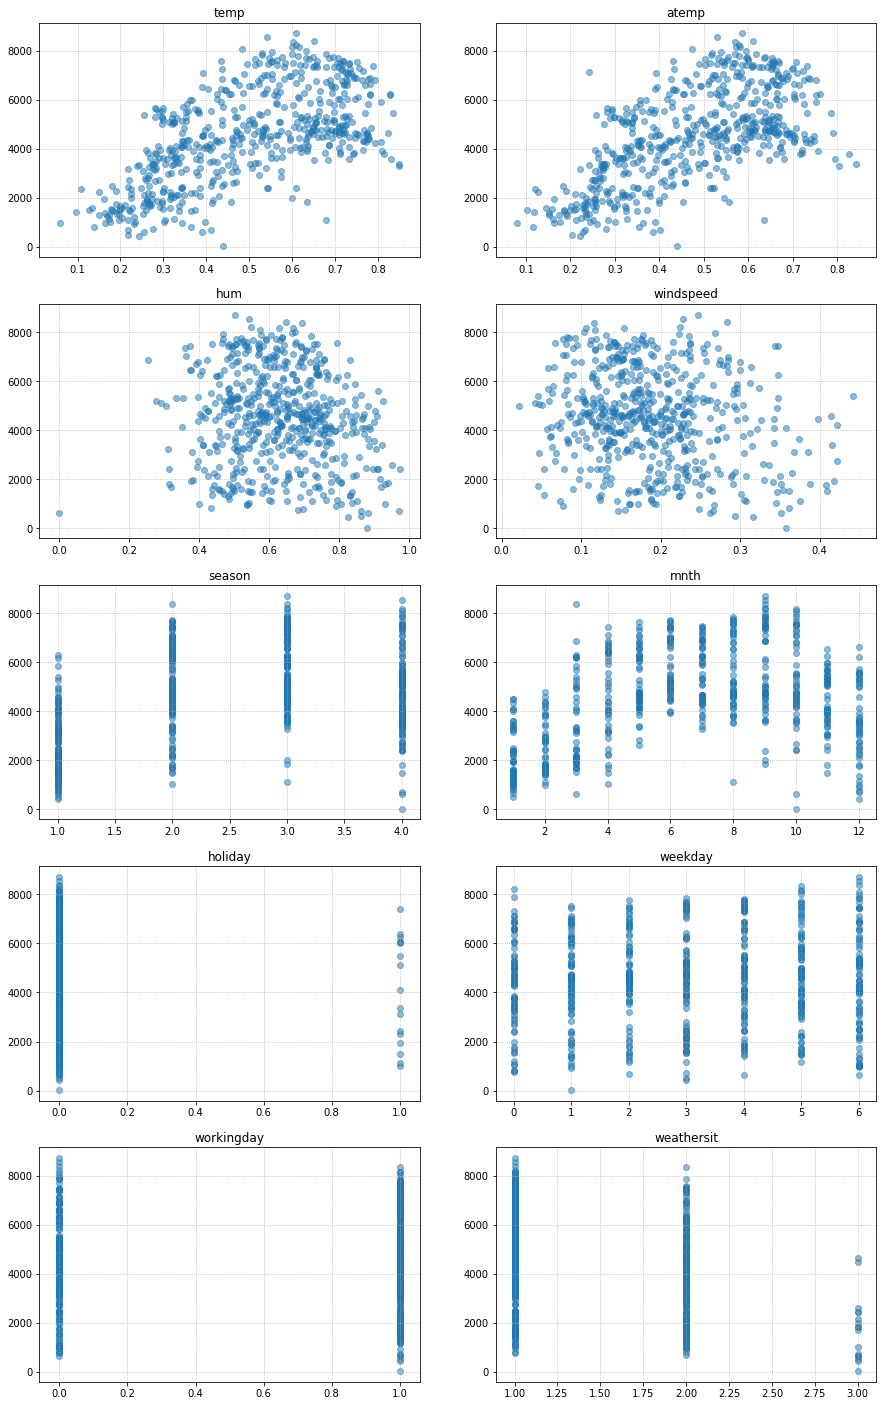

In [116]:
plt.figure(figsize=(15,25))

for i, col in enumerate(train_x):
    plt.subplot(5, 2, i + 1)
    
    plt.scatter(train_x[col], train_y, alpha = 0.5)
    plt.grid(ls=':')
    plt.title(col)

plt.show()

Какие признаки категориальные, а какие &mdash; вещественные? Что нужно сделать с категориальными признаками? Выполните это. При необходимости можно сделать несложную обработку вещественных признаков.

По графикам отчетливо видно, как категориальные и вещественные числа отличаются. Те графики, на которых получаются чуть ли не вертикальные прямые, соответствуют категориальным признакам. В коде указано конкретнее.

In [117]:
real_feat = ['temp', 'atemp',
               'hum', 'windspeed']
cat_feat = ['season','mnth', 'holiday', 'weekday', 
               'workingday', 'weathersit']
target_feat = 'cnt'

In [118]:
encoder = OneHotEncoder(drop='first', categories='auto', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[cat_feat])  # обучаем и кодируем
#train[cat_feat]

In [119]:
train_x = np.hstack([train_x[real_feat], train_cat])
train_x.shape

(584, 28)

Обучите линейную регрессию из `sklearn` на наших данных и посмотрите на полученные оценки коэффициентов.

In [120]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(train_x, train_y)  # обучаем
print('Коэффициенты: ', model.coef_[0])
print('Свободный член: ', model.intercept_[0])

Коэффициенты:  [ 5576.86733608   669.91443824 -3163.58407599 -2414.51924347
  1228.53176907  1106.68946628  1725.12683233   103.43712205
    36.45650563  -252.1419969    -35.02204847  -522.78542548
 -1051.25456704  -694.7971173    393.73789949   158.54348656
  -296.35420697  -120.92445158  -111.42468139  -112.9423415
    76.91265586    68.22844271    45.7815983    107.1558855
   481.2066859    296.56092226  -253.36811556 -2043.99129692]
Свободный член:  2894.355935148436


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

In [121]:
test_x = test[['temp', 'atemp',
               'hum', 'windspeed', 'season','mnth', 'holiday', 'weekday', 
               'workingday', 'weathersit']]
test_y = test[['cnt']]
test_y = test_y.to_numpy()


In [122]:
encoder = OneHotEncoder(drop='first', categories='auto', sparse=False)  # объявляем модель
test_cat = encoder.fit_transform(test[cat_feat])  # обучаем и кодируем

test_x = np.hstack([test_x[real_feat], test_cat])
test_x.shape

(147, 28)

In [123]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

test_preds = model.predict(test_x)

print('RMSE ', metrics.mean_squared_error(test_preds, test_y)**0.5)
print('MAE ', metrics.mean_absolute_error(test_preds, test_y))
print('MAPE ', mean_absolute_percentage_error(test_preds, test_y))

RMSE  1390.304766826216
MAE  1176.3627164728628
MAPE  28.641353730559594


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Подсказка натолкнула на то, чтобы я заметил, что по сути некоторые признаки дублируют друг друга. Например, `atemp` и `temp`, `month` и `season`, `workingday` следует из `weekday` Возможно, следует попробовать убрать некоторые категории, поскольку они не несут смысловой нагрузки.

In [124]:
real_feat = ['temp', 'hum', 'windspeed']
cat_feat = ['mnth', 'holiday', 'weekday', 'weathersit']
target_feat = 'cnt'

train_x, test_x, train_y, test_y = train_test_split(data[real_feat + cat_feat], 
                                                    data[[target_feat]], 
                                                    test_size = 0.2)

In [125]:
encoder = OneHotEncoder(drop='first', categories='auto', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train_x[cat_feat])  # обучаем и кодируем
train_x = np.hstack([train_x[real_feat], train_cat])

In [126]:
model = LinearRegression()
model.fit(train_x, train_y)

print('Коэффициенты: ', model.coef_[0])
print('Свободный член: ', model.intercept_[0])

Коэффициенты:  [ 7234.16620813 -3389.09806627 -3778.25580257  -192.01624614
   577.669537     526.84462864   668.61695572    77.7163037
  -733.68338493    22.49438239  1332.53765595  1615.03759477
  1266.94238547   885.56126582  -767.37277123   306.93584265
   195.27363631   465.70038164   314.12495343   352.078326
   470.20225081  -173.11200715 -1863.99712448]
Свободный член:  3074.7256947196697


Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [127]:
train_cat = encoder.transform(test_x[cat_feat])  
test_x = np.hstack([test_x[real_feat], train_cat])

train_y = train_y.to_numpy()
test_y = test_y.to_numpy()
test_preds = model.predict(test_x)

print('RMSE ', metrics.mean_squared_error(test_preds, test_y) ** 0.5)
print('MAE ', metrics.mean_absolute_error(test_preds, test_y))
print('MAPE ', mean_absolute_percentage_error(test_preds, test_y))

RMSE  1335.8781215683161
MAE  1172.7125123072342
MAPE  25.489515793233046


Сделайте выводы.

**Вывод:** Как мы видим из ошибки предсказания, такое решение избавиться от копий данных пошло только на пользу.

### Задача 3.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
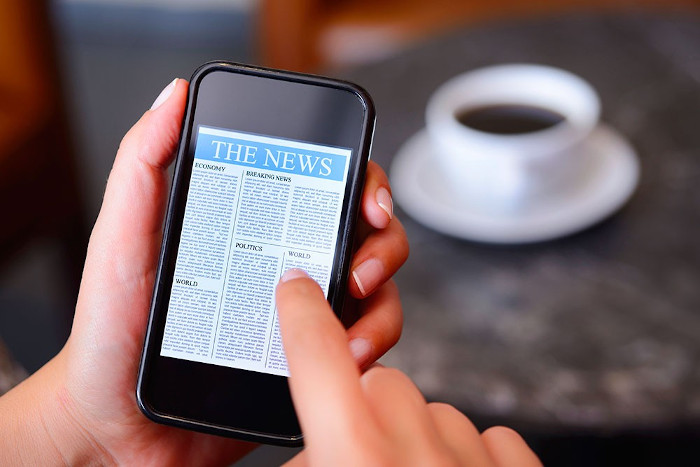



Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [67]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [68]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [69]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [70]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [71]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

Разделим обучающую выборку так, как было посоветовано в условии.

In [128]:
all_data = pd.DataFrame({'data' : data_train['data'],
                  'target' : data_train['target']})
test = pd.DataFrame({'data' : data_test['data'],
                       'target' : data_test['target']})

train, validate = train_test_split(all_data, test_size = 0.2)

Как и в задаче, которая разбиралась на занятии, чтобы обработать текст, мы посмотроим векторное представление для сообщений.

In [129]:
vectorizer = CountVectorizer(min_df=0.01, max_df=0.05)
vec_train = vectorizer.fit_transform(train['data']).toarray()
vec_validate = vectorizer.transform(validate['data']).toarray()

В задаче для признаков, описывающих количество вхождений каждого слова из словаря в сообщение, лучше использовать `MultinomialNB`. Также воспользуемся `validate`, чтобы подобрать лучший `alpha` для него. 

In [135]:
alphas = np.array([0, 0.25, 0.5, 0.75, 1])
for a in alphas:
    multinomial_nb = MultinomialNB(alpha=a)
    multinomial_nb.fit(vec_train, train['target'])
    print('Точность для alpha = ', a, ':', accuracy_score(validate.target,
                                                               multinomial_nb.predict(vec_validate)))

/Users/islam/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Точность для alpha =  0.0 : 0.6557666813963765
Точность для alpha =  0.25 : 0.692001767565179
Точность для alpha =  0.5 : 0.693769332744145
Точность для alpha =  0.75 : 0.6933274414494034
Точность для alpha =  1.0 : 0.690234202386213


Наилучший `alpha` достигается при $0.25$.

In [91]:
a = 0.25
vectorizer = CountVectorizer(min_df=0.01, max_df=0.05)
vec = vectorizer.fit_transform(all_data['data']).toarray()

multinomial_nb = MultinomialNB(alpha = a)
multinomial_nb.fit(vec, all_data['target'])

MultinomialNB(alpha=0.25, class_prior=None, fit_prior=True)

Посчитайте качество на тестовой выборке.

In [92]:
vec_test = vectorizer.transform(test['data']).toarray()
predictions = multinomial_nb.predict(vec_test)
print('Точность: ', accuracy_score(test.target, predictions))

Точность:  0.6104620286776421


Сделайте выводы.

**Вывод:**
Мы построили такую модель классификации, и получилась неплохая точность.

### <font color="orange"><i>Сложная часть</i></font>

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.